In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.6. Volcano Plot/Output')
cur_date = "071122"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

#reading in file
protein_df = data.frame(read_excel("Input/071122_Statistical_Results_Only.xlsx")) %>%
    mutate(Treatment = ifelse(Treatment == "CoCulture", "Co-Culture", "Tri-Culture"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(protein_df)

,Set,Treatment,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Set1,Co-Culture,P02751,FN1,-0.09664782,0.3712160,0.7217334685,0.90261007
2,Set1,Co-Culture,P98160,HSPG2,-0.37199408,1.3220928,0.2155840099,0.72056215
3,Set1,Co-Culture,P12111,COL6A3,0.25760674,-1.5293073,0.1735217887,0.66833001
4,Set1,Co-Culture,P21333,FLNA,-0.38907251,0.9679196,0.3568358777,0.82500368
5,Set1,Co-Culture,O00468,AGRN,-0.43881516,5.2320284,0.0008717592,0.08205816
6,Set1,Co-Culture,P35555,FBN1,-0.41703532,1.6481156,0.1402935776,0.64943412


In [3]:
# adding a col to denote whether a protein had a significant p adjust value, log FC, or both

# add a column of NAs
protein_df$diffexpressed <- "No Significance"

# if p adjust is significant only
protein_df$diffexpressed[protein_df$P.Adj < 0.2] <- "P Adjust Only"

# if log2FC > log2(1.3) and P.Adj < 0.2, set as "UP" 
protein_df$diffexpressed[abs(protein_df$log2FC) > abs(log2(1.3)) & protein_df$P.Adj < 0.2] <- "P Adjust and log2 Fold Change"

# making into a factor
protein_df$diffexpressed = factor(protein_df$diffexpressed, levels = c("No Significance", "P Adjust Only", 
                                                                       "P Adjust and log2 Fold Change"))

# putting the treatment col into a factor
protein_df$Treatment = factor(protein_df$Treatment, levels = c("Tri-Culture", "Co-Culture"))

# viewing df
head(protein_df)

,Set,Treatment,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj,diffexpressed
,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Set1,Co-Culture,P02751,FN1,-0.09664782,0.3712160,0.7217334685,0.90261007,No Significance
2,Set1,Co-Culture,P98160,HSPG2,-0.37199408,1.3220928,0.2155840099,0.72056215,No Significance
3,Set1,Co-Culture,P12111,COL6A3,0.25760674,-1.5293073,0.1735217887,0.66833001,No Significance
4,Set1,Co-Culture,P21333,FLNA,-0.38907251,0.9679196,0.3568358777,0.82500368,No Significance
5,Set1,Co-Culture,O00468,AGRN,-0.43881516,5.2320284,0.0008717592,0.08205816,P Adjust and log2 Fold Change
6,Set1,Co-Culture,P35555,FBN1,-0.41703532,1.6481156,0.1402935776,0.64943412,No Significance


# Volcano Plot

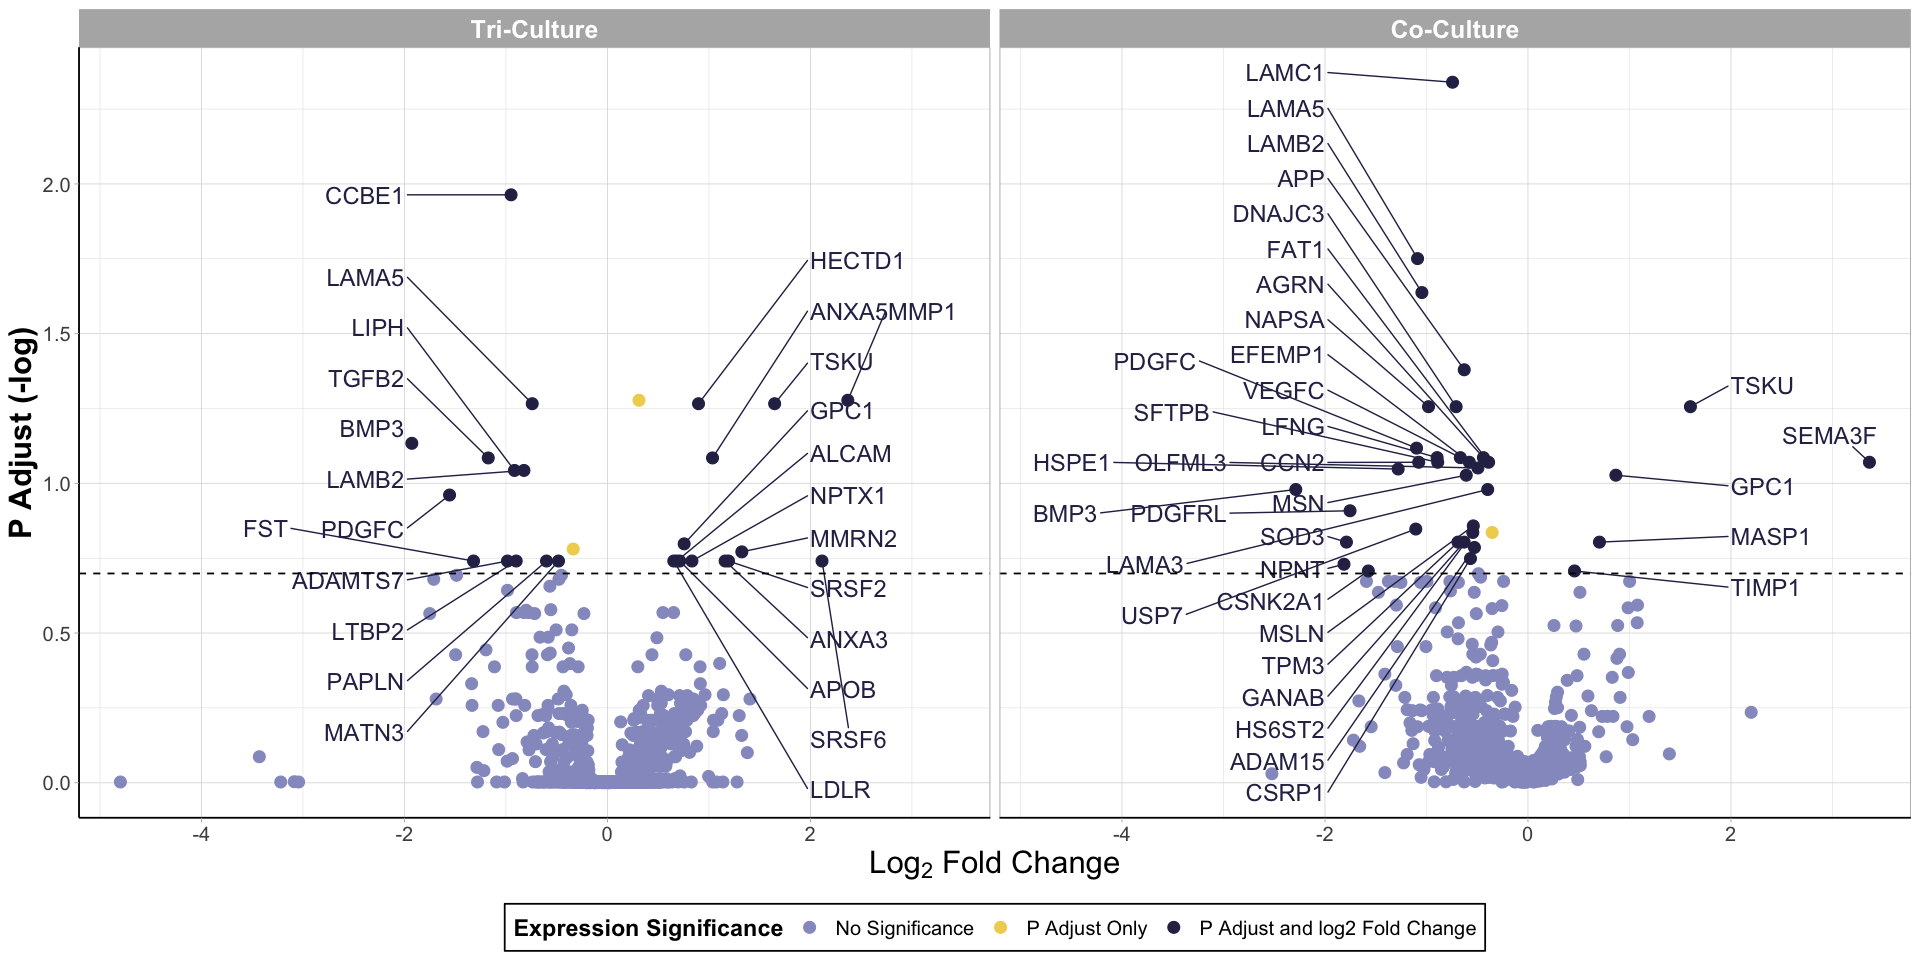

In [4]:
options(repr.plot.width=16, repr.plot.height=8) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$VanGogh1[[1]]

Figure6 = ggplot() + 
  geom_point(data = protein_df, aes(x = log2FC, y = -log10(P.Adj), color = diffexpressed), size = 3) + 

  #labeling points with statistical significance and FC
  geom_text_repel(data = protein_df %>%
                      filter(log2FC > log2(1.3) & diffexpressed == "P Adjust and log2 Fold Change"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Gene.name, color = diffexpressed),
    xlim = c(2, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = protein_df %>%
                      filter(log2FC < log2(1.3) & diffexpressed == "P Adjust and log2 Fold Change"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Gene.name, color = diffexpressed),
    xlim = c(NA, -2),
    hjust = 1,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  # P Adjust line
  geom_hline(yintercept = -log10(0.2), linetype = "dashed") + 

  facet_wrap(~Treatment) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Expression Significance",
                      values = c(metbrewer_colors[4], '#F0D25E', metbrewer_colors[1]))

Figure6

In [5]:
# exporting figure
ggsave(Figure6, 
       filename = 'Figure6.pdf',
       path = Output,
       width = 16, height = 8)